In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib import cm

"""
Hypothesis Function
"""
def hypothesis(A0, A1, A2, X):
	h = A0 + A1*X + A2*X**2
	return h

def plotErrorVsIteration(Jgd, iteration):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(np.arange(0, iteration), Jgd[0:iteration])
    plt.xlim((0, iteration))
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('$J_e$')
    plt.title('Error vs. Iteration number')
    plt.show()

## --------------------------------------------------------   
    
# Number of examples.
M = 1000

X = np.random.uniform(-5,5, size=(M, 1))
W = np.random.normal(loc=0.0, scale=10, size=(M, 1))
y = 3 + 1.5*X + 2.3*X**2 + W

# add x0 = 1 to each instance.
X_b = np.c_[np.ones((M, 1)), X]
X_b = np.c_[np.ones((M, 1)), X_b]

In [2]:
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X, y, M):
    # Closed-form solution.
    a = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    h = hypothesis(a[0, 0], a[1, 0], a[2, 0], X)
    Joptimum = (1/M)*np.sum(np.power((y - h), 2))
    
    return Joptimum, a

# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b, y, M)
print('Closed-Form Solution\na0: ' + str(a_opt[0, 0]) + '\na1: ' + str(a_opt[1, 0]) + '\na2: ' + str(a_opt[2, 0]) + '\n')

Closed-Form Solution
a0: 11.454767787627635
a1: 11.454767787627631
a2: 1.7892819197028231



Batch Gradient-Descent Algorithm (alpha=0.0006)
a0: 11.221655715374368
a1: 11.221655715374368
a2: 0.4295020987242454



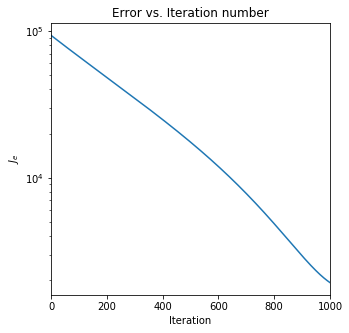

In [12]:
"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X, y):
    # Random initialization of parameters.
    a = np.zeros((3,1))
    a[0] = -20
    a[1] = -20
    a[2] = -20
    
    Jgd = np.zeros(n_iterations+1)
    h = hypothesis(a[0], a[1], a[2], X)
    Jgd[0] = (1/M)*np.sum(np.power(y - h, 2))
    

    # Create vector for parameter history.
    a_hist = np.zeros((3, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]
    a_hist[2, 0] = a[2]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        h = hypothesis(a_hist[0, iteration], a_hist[1, iteration], a_hist[2, iteration], X)
        gradients = -2/M * X_b.T.dot(y - h)
        a = a - alpha * gradients
        a_hist[0, iteration+1] = a[0, 0]
        a_hist[1, iteration+1] = a[1, 0]
        a_hist[2, iteration+1] = a[2, 0]
        h = hypothesis(a_hist[0, iteration+1], a_hist[1, iteration+1], a_hist[2, iteration+1], X)
        Jgd[iteration+1] = (1/M)*np.sum(np.power(y - h, 2))
        
    return a, a_hist, Jgd

# Run batch gradient-descent algorithm.
alpha = 0.0006  # learning rate
a, a_hist, Jgd = batchGradientDescent(alpha, n_iterations, X_b, y)
print('Batch Gradient-Descent Algorithm (alpha=' + str(alpha) + ')\na0: ' + str(a_hist[0, n_iterations]) + '\na1: ' + str(a_hist[1, n_iterations]) + '\na2: ' + str(a_hist[2, n_iterations]) + '\n')
plotErrorVsIteration(Jgd, n_iterations)